##### Import libraries

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### Create dice dataframe with 1K rolls

In [14]:
'''
ASIDE - Loop creation is very slow

df = pd.DataFrame(columns=['Die 1','Die 2','Total'])

for i in range(1000):
    die1_roll = np.random.randint(1,7)
    die2_roll = np.random.randint(1,7)
    roll_total = die1_roll + die2_roll

    df.loc[len(df)] = (die1_roll,die2_roll,roll_total)
'''

# Take advantage of Numpy's speed
die1_rolls = np.random.randint(1, 7, 1000)
die2_rolls = np.random.randint(1, 7, 1000)
roll_totals = np.add(die1_rolls, die2_rolls)

df = pd.DataFrame({'Die 1': die1_rolls, 'Die 2': die2_rolls, 'Total': roll_totals})

print(df.head())


   Die 1  Die 2  Total
0      1      6      7
1      1      2      3
2      5      1      6
3      6      6     12
4      3      1      4


##### Plot a histogram of the results

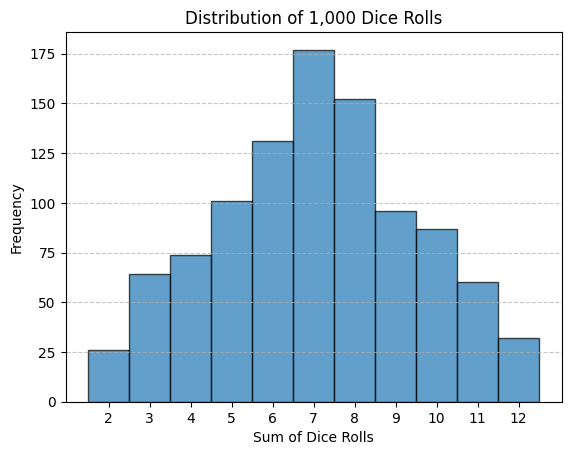

In [15]:
''' 
Plain histogram
plt.hist(df["Total"])
'''

# Adding design elements for increased readability
plt.hist(df['Total'], bins=np.arange(1.5, 13.5, 1), edgecolor='black', alpha=0.7)
plt.xlabel('Sum of Dice Rolls')
plt.ylabel('Frequency')
plt.title('Distribution of 1,000 Dice Rolls')
plt.xticks(range(2,13))
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

##### Compare empirical and theoretical probabilities

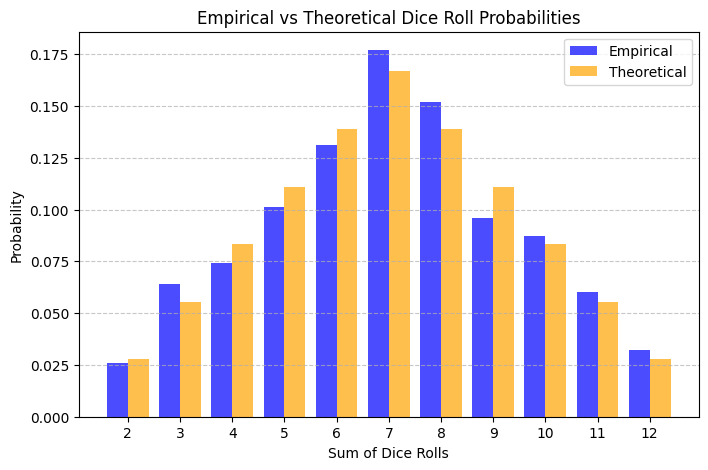

In [28]:
'''
# Could use Counter from Python collections, but it returns a Counter object
emp_prob = Counter(df['Total'])
print(emp_prob)'
'''

# Better to use Dataframe.value_counts() since it returns a Series
emp_prob = df.value_counts('Total', normalize=True).sort_index()
# print(emp_prob)

theo_prob = pd.Series({2: 1/36, 3: 2/36, 4: 3/36, 5: 4/36, 6: 5/36, 7: 6/36,
                    8: 5/36, 9: 4/36, 10: 3/36, 11: 2/36, 12: 1/36})
# print(theo_prob)

plt.figure(figsize=(8,5))
plt.bar(emp_prob.index - 0.2, emp_prob.values, width=0.4, label='Empirical', alpha=0.7, color='blue')
plt.bar(theo_prob.index + 0.2, theo_prob.values, width=0.4, label='Theoretical', alpha=0.7, color='orange')
plt.xlabel('Sum of Dice Rolls')
plt.ylabel('Probability')
plt.title('Empirical vs Theoretical Dice Roll Probabilities')
plt.xticks(range(2,13))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()